<a href="https://colab.research.google.com/github/danyentezari/bn-ocr/blob/main/BN_Image_DSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,960 kB/s)
debconf: unable to initi

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.io import wavfile
from PIL import Image
from scipy import ndimage

import imageio

In [ ]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (9, 7)

In [ ]:
# open method used to open different extension image file
im = Image.open(r"./sample.png") 
  
# This method will show image in any image viewer 
im.show() 

In [ ]:
im = imageio.imread('./sample.png')
print(im.shape)

(488, 1750, 4)


Text(0, 0.5, 'Pixel count')

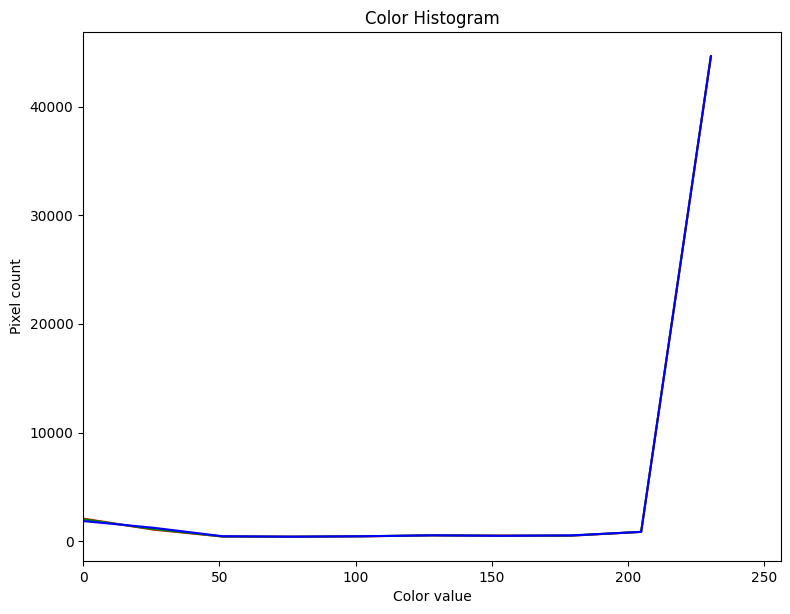

In [ ]:
im = imageio.imread('./word.png')

# tuple to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        im[:, :, channel_id], bins=10, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")


Text(0, 0.5, 'Pixel count')

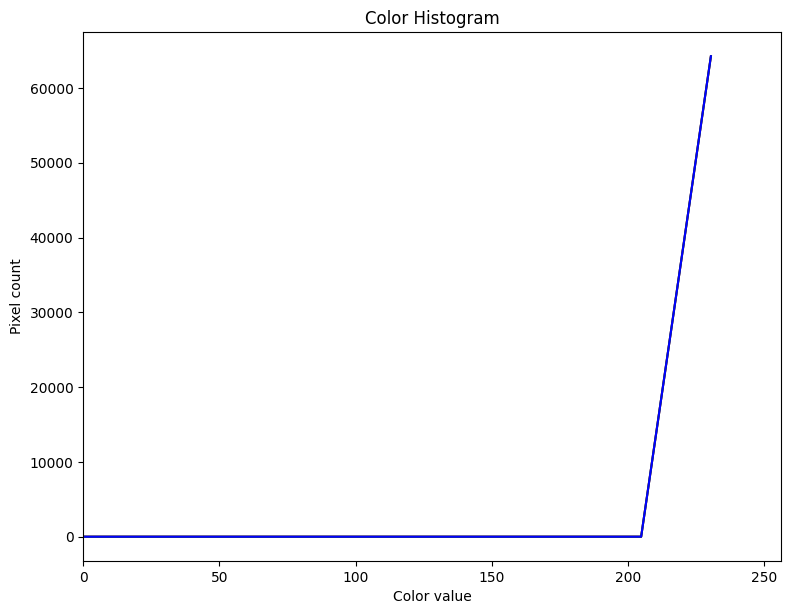

In [ ]:
im = imageio.imread('./space.png')

# tuple to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        im[:, :, channel_id], bins=10, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")


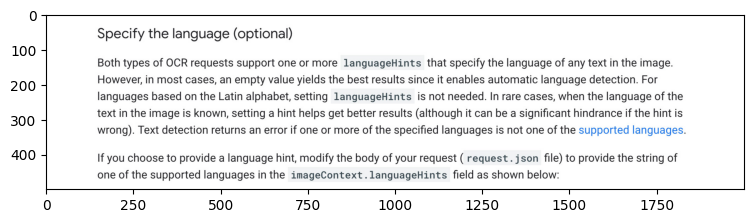

In [ ]:
sample = imageio.imread('./sample-resized.jpg')
sample.shape
plt.imshow(sample)

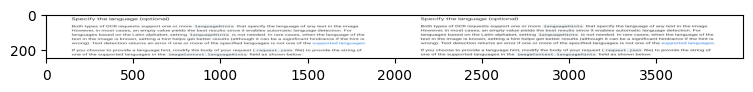

In [ ]:
sample = sample.reshape(250, 4000, 3)
plt.imshow(sample)

In [ ]:
# for column in sample[10000][:10]:a
#   print(column)

In [ ]:
from PIL import Image, ImageFilter
  
  
# Opening the image (R prefixed to string
# in order to deal with '\' in paths)
image = Image.open(r"./sample.png")
  
# Converting the image to grayscale, as edge detection 
# requires input image to be of mode = Grayscale (L)
image = image.convert("L")
  
# Detecting Edges on the Image using the argument ImageFilter.FIND_EDGES
image = image.filter(ImageFilter.FIND_EDGES)
  
# Saving the Image Under the name Edge_Sample.png
image.save(r"./sEdge_sample.png")

### Edge Detection

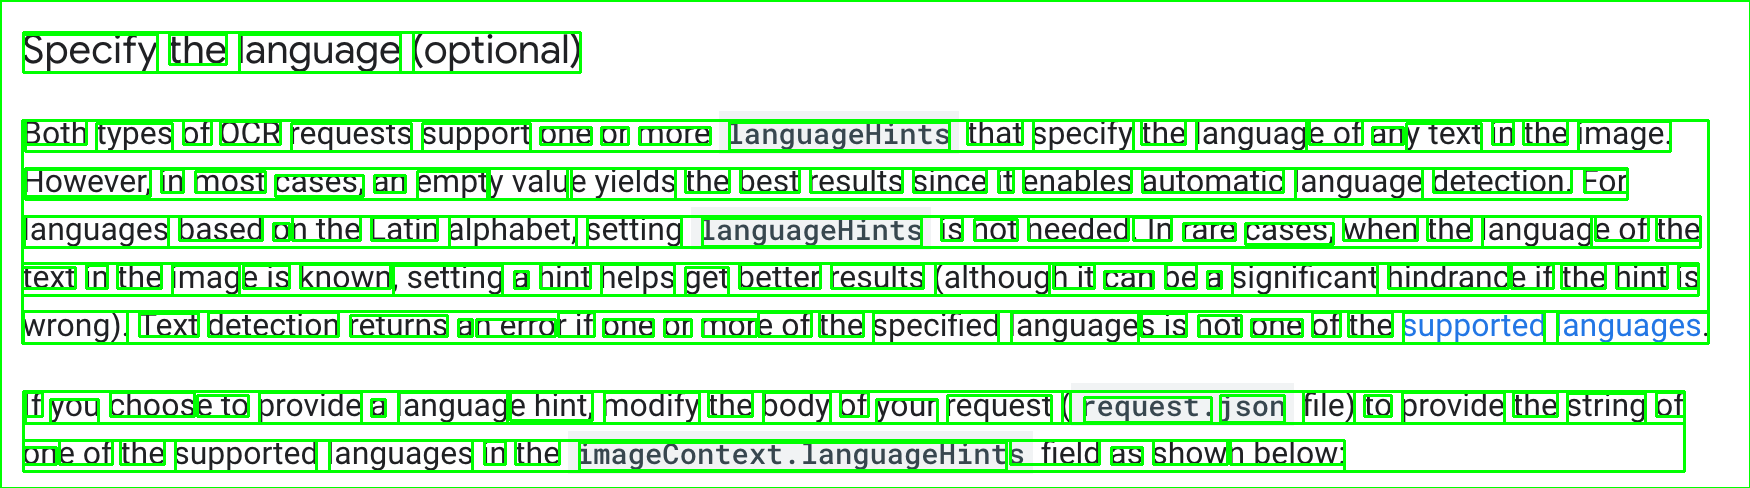

In [ ]:
# Reference:
# https://stackoverflow.com/questions/20831612/getting-the-bounding-box-of-the-recognized-words-using-python-tesseract
# https://medium.com/geekculture/tesseract-ocr-understanding-the-contents-of-documents-beyond-their-text-a98704b7c655
import pytesseract
from pytesseract import Output
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('./sample.png')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)

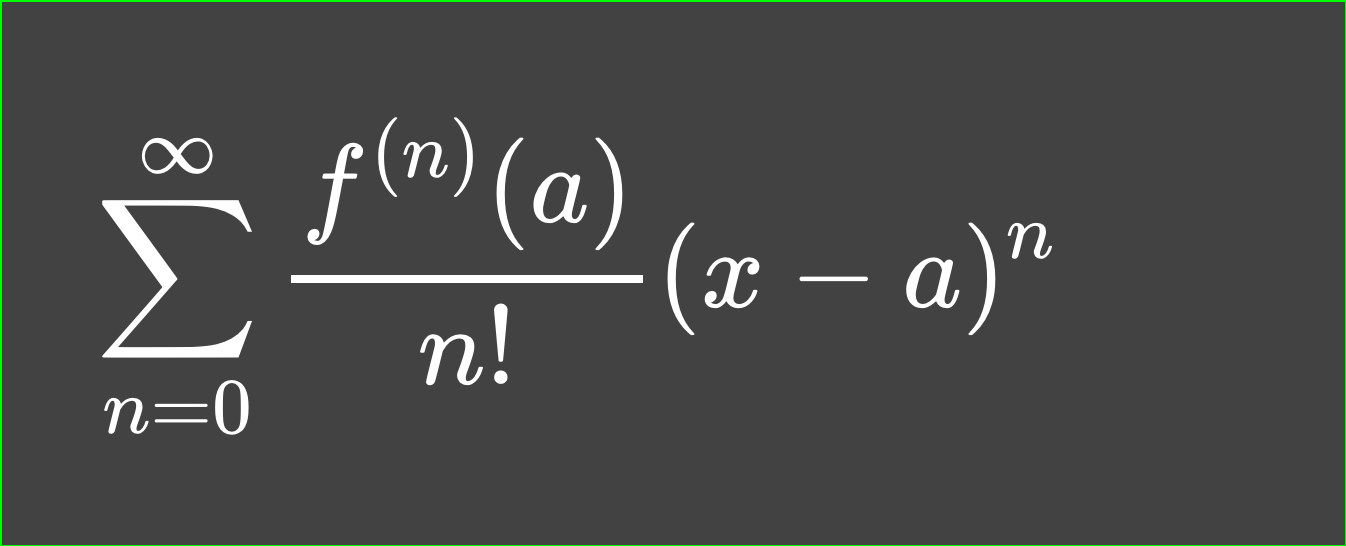

In [ ]:
img = cv2.imread('./sample-math.png')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)

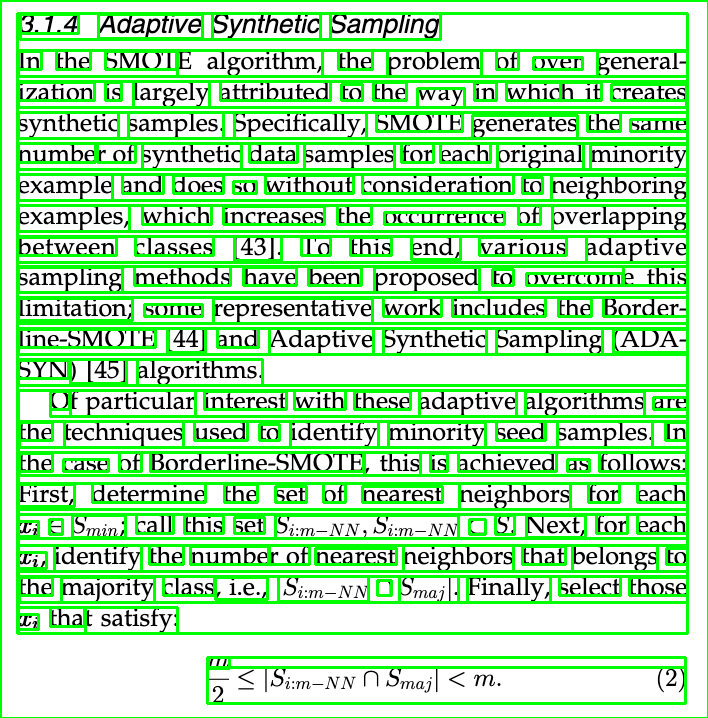

In [ ]:
img = cv2.imread('./sample-mix.png')
snippets = []

# d = pytesseract.image_to_data(img, output_type=Output.DICT)
d = pytesseract.image_to_data(img, output_type='data.frame', config=r'-c preserve_interword_spaces=1')
# n_boxes = len(d['level'])
n_boxes = len(d[d['level'] >= 4])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    snippets.append(((x, y, x+w, y+h)))
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)

In [ ]:
n_boxes

188

In [ ]:
(x, y, x+w, y+h)

(207, 667, 685, 703)

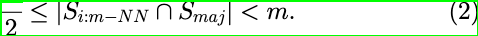

In [ ]:
# #snippet = img[y:y+h, x:x+w]
# cv2_imshow(snippet)

In [113]:
(x, y, x2, y2) = snippets[120]
snippet = img[y:y2, x:x2]
cv2_imshow(snippet)

In [85]:
len(snippets)

188

In [83]:
# for s in snippets[len(snippets)-57: len(snippets)-58]:
#   (x, y, x2, y2) = s#snippets[len(snippets)-63]
#   snippet = img[y:y2, x:x2]
#   cv2_imshow(snippet)

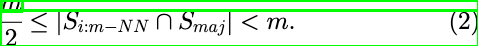

In [110]:
(x, y, x2, y2) = snippets[len(snippets)-4]
snippet = img[y:y2, x:x2]
cv2_imshow(snippet)

In [ ]:
d[d['level'] >= 5].tail(30)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
159,5,1,1,3,6,2,54,545,87,26,93,identify
160,5,1,1,3,6,3,149,545,34,19,97,the
161,5,1,1,3,6,4,190,546,78,18,96,number
162,5,1,1,3,6,5,269,545,40,19,97,of
163,5,1,1,3,6,6,315,548,81,16,96,nearest
164,5,1,1,3,6,7,403,545,110,26,96,neighbors
165,5,1,1,3,6,8,522,546,43,18,96,that
166,5,1,1,3,6,9,572,545,85,26,96,belongs
167,5,1,1,3,6,10,666,548,21,16,96,to
169,5,1,1,3,7,1,19,577,33,18,96,the


### other snippets

In [ ]:
# Text height
# reference: 
# https://stackoverflow.com/questions/12833586/finding-line-height-and-baseline-from-tesseract-output
#
# Tesseract.getUtf8Text().getBoxRects()


# https://stackoverflow.com/questions/55406993/how-to-get-confidence-of-each-line-using-pytesseract